In [1]:
#coding:utf-8

import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt

from pandas import Series,DataFrame 

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['STHeiti'] #用来正常显示中文标签  mac win字体不一样
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

In [2]:
connect = pymysql.connect(host = "localhost", port = 3306, user = "root", password = "123456", database = 'processSentiment', charset='utf8')
sql = 'select * from BiliComment_NoRepeat'
df_senti=pd.read_sql(sql, connect)

,keyOrder,uname,mid,ctime,message,text_confidence,text_pos_score,text_neg_score,likehah,rcount,sex,current_level,sign,plat
0,1,Bili_12156495,12156495,2019-08-03 16:38:26,嗯？沙发？。,0.906338,0.042148,0.957852,0,0,男,5,,3
1,2,丿红红火火恍恍惚惚丶丶,42777650,2019-08-03 16:38:26,好早。,0.995621,0.998029,0.001971,0,0,保密,3,,2
2,3,舊夢護城,389411339,2019-08-03 16:38:26,前排。,0.919610,0.963824,0.036176,0,0,男,2,,2
3,4,DYJ0613,8923364,2019-08-03 16:38:27,发现错别字！。,0.263086,0.331611,0.668389,0,0,女,5,这是一个很认真的简介,2
4,5,oldyellow君,205191022,2019-08-03 16:38:27,你的名字归我啦[害羞]。,0.999312,0.999690,0.000309,2,0,保密,5,关注过一个亿女装\n就是永不女装的意思哈哈哈哈哈哈\n,2


In [4]:
# 列切片
df = df_senti.loc[:,['keyOrder', 'ctime', 'message','text_confidence', 'text_pos_score', 'text_neg_score']]
# 行切片
#df = df[:100000]
df.head()

,keyOrder,ctime,message,text_confidence,text_pos_score,text_neg_score
0,1,2019-08-03 16:38:26,嗯？沙发？。,0.906338,0.042148,0.957852
1,2,2019-08-03 16:38:26,好早。,0.995621,0.998029,0.001971
2,3,2019-08-03 16:38:26,前排。,0.919610,0.963824,0.036176
3,4,2019-08-03 16:38:27,发现错别字！。,0.263086,0.331611,0.668389
4,5,2019-08-03 16:38:27,你的名字归我啦[害羞]。,0.999312,0.999690,0.000309


## 情感得分、情感正负赋值

In [5]:
def distribute_socre(f1_pos, f2_neg):
    if f1_pos >= f2_neg:
        return f1_pos
    else:
        return -f2_neg
# 看正负得分那个分数高 ，就分配给sentiment ，在返回时，把消极情感得分弄成负数
df['sentiment_score']= df.apply(lambda x : distribute_socre(x['text_pos_score'],x['text_neg_score']),axis = 1)# axis=1意味着把行 当做变量传进去,

def distribute_incl(f1_pos, f2_neg):
    if f1_pos >= f2_neg:
        return 1
    else:
        return 0
# 看正负得分那个分数高 ，就分配给sentiment ，在返回时，把消极情感得分弄成负数
df['sentiment_incl']= df.apply(lambda x : distribute_incl(x['text_pos_score'],x['text_neg_score']),axis = 1)# axis=1意味着把行 当做变量传进去,



df.head()

,keyOrder,ctime,message,text_confidence,text_pos_score,text_neg_score,sentiment_score,sentiment_incl
0,1,2019-08-03 16:38:26,嗯？沙发？。,0.906338,0.042148,0.957852,-0.957852,0
1,2,2019-08-03 16:38:26,好早。,0.995621,0.998029,0.001971,0.998029,1
2,3,2019-08-03 16:38:26,前排。,0.919610,0.963824,0.036176,0.963824,1
3,4,2019-08-03 16:38:27,发现错别字！。,0.263086,0.331611,0.668389,-0.668389,0
4,5,2019-08-03 16:38:27,你的名字归我啦[害羞]。,0.999312,0.999690,0.000309,0.999690,1


In [6]:
# 把 ctime字段 拆分

df['ctime_specific']=df['ctime'].str.split(' ',expand=True)[1]#多名字分列
df['ctime_Y_M_D']=df['ctime'].str.split(' ',expand=True)[0]#多名字分列

df.head(10)

,keyOrder,ctime,message,text_confidence,text_pos_score,text_neg_score,sentiment_score,sentiment_incl,ctime_specific,ctime_Y_M_D
0,1,2019-08-03 16:38:26,嗯？沙发？。,0.906338,0.042148,0.957852,-0.957852,0,16:38:26,2019-08-03
1,2,2019-08-03 16:38:26,好早。,0.995621,0.998029,0.001971,0.998029,1,16:38:26,2019-08-03
2,3,2019-08-03 16:38:26,前排。,0.919610,0.963824,0.036176,0.963824,1,16:38:26,2019-08-03
3,4,2019-08-03 16:38:27,发现错别字！。,0.263086,0.331611,0.668389,-0.668389,0,16:38:27,2019-08-03
4,5,2019-08-03 16:38:27,你的名字归我啦[害羞]。,0.999312,0.999690,0.000309,0.999690,1,16:38:27,2019-08-03
5,6,2019-08-03 16:38:27,热评就在眼前，然而没有骚段子[蛆音娘_扶额]。,0.989790,0.004595,0.995405,-0.995405,0,16:38:27,2019-08-03
6,7,2019-08-03 16:38:27,我的天。,0.915382,0.961922,0.038078,0.961922,1,16:38:27,2019-08-03
7,8,2019-08-03 16:38:28,来啦来啦。,0.997771,0.998997,0.001003,0.998997,1,16:38:28,2019-08-03
8,9,2019-08-03 16:38:28,哈哈哈哈。,0.975279,0.988876,0.011124,0.988876,1,16:38:28,2019-08-03
9,10,2019-08-03 16:38:28,加油啊。,0.999465,0.999759,0.000241,0.999759,1,16:38:28,2019-08-03


## 情感得分在时间轴中分布情况

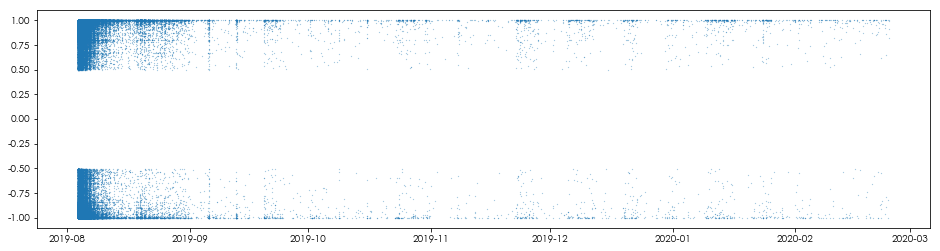

In [49]:
# 总时间段 三点分布
import datetime as dt
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))

dates = df.ctime.values.tolist()
x = [dt.datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in dates]
y = df.sentiment_score.values.tolist()

plt.plot_date(x, y, '.', markersize = 0.3)
plt.show()


In [8]:
df.head()

,keyOrder,ctime,message,text_confidence,text_pos_score,text_neg_score,sentiment_score,sentiment_incl,ctime_specific,ctime_Y_M_D
0,1,2019-08-03 16:38:26,嗯？沙发？。,0.906338,0.042148,0.957852,-0.957852,0,16:38:26,2019-08-03
1,2,2019-08-03 16:38:26,好早。,0.995621,0.998029,0.001971,0.998029,1,16:38:26,2019-08-03
2,3,2019-08-03 16:38:26,前排。,0.919610,0.963824,0.036176,0.963824,1,16:38:26,2019-08-03
3,4,2019-08-03 16:38:27,发现错别字！。,0.263086,0.331611,0.668389,-0.668389,0,16:38:27,2019-08-03
4,5,2019-08-03 16:38:27,你的名字归我啦[害羞]。,0.999312,0.999690,0.000309,0.999690,1,16:38:27,2019-08-03


## 每日 情感平均得分 波动

In [9]:
# 对 年月日进行聚合处理

# 聚合后 单列－单指标 统计
res_YMD_Sentiment = df.groupby('ctime_Y_M_D')['sentiment_score'].mean()
# 取出 series 中 索引和值 ，弄成一个字典
dict_res = {'ctime_Y_M_D':res_YMD_Sentiment.index,'sentiment_score':res_YMD_Sentiment.values}
df_YMD_Sentiment = pd.DataFrame(dict_res)
df_YMD_Sentiment.head()

,ctime_Y_M_D,sentiment_score
0,2019-08-03,0.405641
1,2019-08-04,0.398853
2,2019-08-05,0.378125
3,2019-08-06,0.366200
4,2019-08-07,0.372079


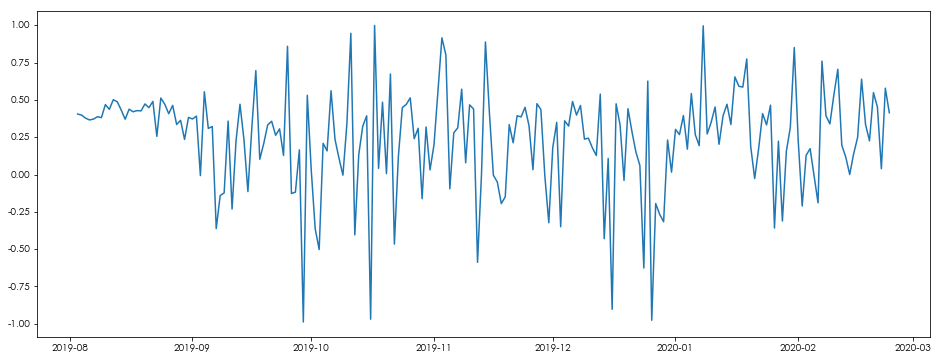

In [10]:
# 每日 情感平均得分 波动

import datetime as dt
plt.figure(figsize=(16,6))

dates_YMD = df_YMD_Sentiment.ctime_Y_M_D.values.tolist()
x = [dt.datetime.strptime(d,'%Y-%m-%d') for d in dates_YMD]
y = df_YMD_Sentiment.sentiment_score.values.tolist()

plt.plot_date(x, y, '-')
plt.show()

In [11]:
df.head()

,keyOrder,ctime,message,text_confidence,text_pos_score,text_neg_score,sentiment_score,sentiment_incl,ctime_specific,ctime_Y_M_D
0,1,2019-08-03 16:38:26,嗯？沙发？。,0.906338,0.042148,0.957852,-0.957852,0,16:38:26,2019-08-03
1,2,2019-08-03 16:38:26,好早。,0.995621,0.998029,0.001971,0.998029,1,16:38:26,2019-08-03
2,3,2019-08-03 16:38:26,前排。,0.919610,0.963824,0.036176,0.963824,1,16:38:26,2019-08-03
3,4,2019-08-03 16:38:27,发现错别字！。,0.263086,0.331611,0.668389,-0.668389,0,16:38:27,2019-08-03
4,5,2019-08-03 16:38:27,你的名字归我啦[害羞]。,0.999312,0.999690,0.000309,0.999690,1,16:38:27,2019-08-03


## 每日 发言频次 波动

In [50]:
# 对  发言频次 进行聚合处理

# 聚合后 单列－单指标 统计
res_YMD_pinci = df.groupby('ctime_Y_M_D')['message'].count()

# 取出 series 中 索引和值 ，弄成一个字典
dict_res = {'ctime_Y_M_D':res_YMD_pinci.index,'message':res_YMD_pinci.values}
df_YMD_pinci = pd.DataFrame(dict_res)
df_YMD_pinci.head()

,ctime_Y_M_D,message
0,2019-08-03,45860
1,2019-08-04,43632
2,2019-08-05,16918
3,2019-08-06,8073
4,2019-08-07,3859


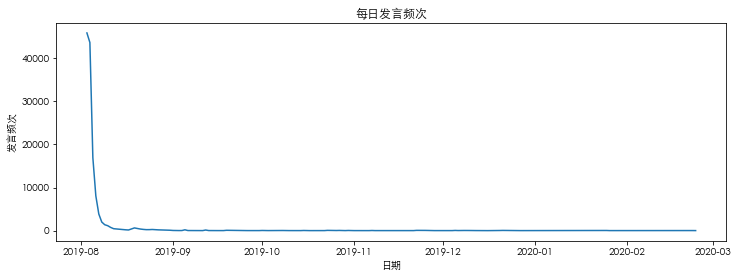

In [18]:
# 每日 发言频次 波动

import datetime as dt
plt.figure(figsize=(12,4))

dates_YMD = df_YMD_pinci.ctime_Y_M_D.values.tolist()
x = [dt.datetime.strptime(d,'%Y-%m-%d') for d in dates_YMD]
y = df_YMD_pinci.message.values.tolist()

plt.title('每日发言频次')#显示图表标题

plt.xlabel('日期')#x轴名称
plt.ylabel('发言频次')#y轴名称

plt.plot_date(x, y, '-')
plt.show()

## 前10日 发言频次 波动


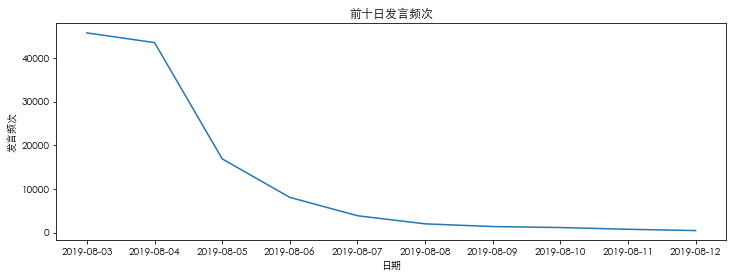

In [28]:
# 前10日 发言频次 波动

import datetime as dt
plt.figure(figsize=(12,4))

dates_YMD = df_YMD_pinci.ctime_Y_M_D.values.tolist()[:10]
x = [dt.datetime.strptime(d,'%Y-%m-%d') for d in dates_YMD]
y = df_YMD_pinci.message.values.tolist()[:10]

plt.title('前十日发言频次')#显示图表标题

plt.xlabel('日期')#x轴名称
plt.ylabel('发言频次')#y轴名称

plt.plot_date(x, y, '-')
plt.show()

## 每时 发言频次 波动

In [44]:
# 对  发言频次 进行聚合处理

# 聚合后 单列－单指标 统计
df['ctime_hour'] = df['ctime'].str.split(':',expand=True)[0]#多名字分列

# 聚合后 单列－单指标 统计
res_YMD_pinci_hour = df.groupby('ctime_hour')['message'].count()

# 取出 series 中 索引和值 ，弄成一个字典
dict_res_hour = {'ctime_hour':res_YMD_pinci_hour.index,'message':res_YMD_pinci_hour.values}
df_YMD_pinci_hour = pd.DataFrame(dict_res_hour)
df_YMD_pinci_hour.head()

,ctime_hour,message
0,2019-08-03 16,4237
1,2019-08-03 17,6751
2,2019-08-03 18,6728
3,2019-08-03 19,6004
4,2019-08-03 20,5355


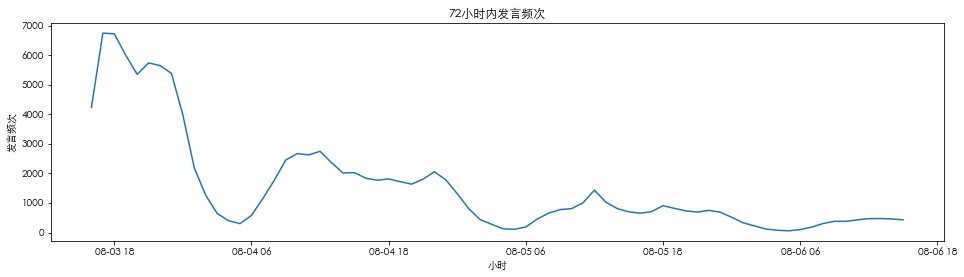

In [106]:
# 前72小时 发言频次 波动

import datetime as dt
plt.figure(figsize=(16,4))

dates_hour = df_YMD_pinci_hour.ctime_hour.values.tolist()[:72]
x = [dt.datetime.strptime(d,'%Y-%m-%d %H') for d in dates_hour]
y = df_YMD_pinci_hour.message.values.tolist()[:72]

plt.title('72小时内发言频次')#显示图表标题

plt.xlabel('小时')#x轴名称
plt.ylabel('发言频次')#y轴名称

plt.plot_date(x, y, '-')
plt.show()

In [58]:
df.head()

,keyOrder,ctime,message,text_confidence,text_pos_score,text_neg_score,sentiment_score,sentiment_incl,ctime_specific,ctime_Y_M_D,ctime_hour
0,1,2019-08-03 16:38:26,嗯？沙发？。,0.906338,0.042148,0.957852,-0.957852,0,16:38:26,2019-08-03,2019-08-03 16
1,2,2019-08-03 16:38:26,好早。,0.995621,0.998029,0.001971,0.998029,1,16:38:26,2019-08-03,2019-08-03 16
2,3,2019-08-03 16:38:26,前排。,0.919610,0.963824,0.036176,0.963824,1,16:38:26,2019-08-03,2019-08-03 16
3,4,2019-08-03 16:38:27,发现错别字！。,0.263086,0.331611,0.668389,-0.668389,0,16:38:27,2019-08-03,2019-08-03 16
4,5,2019-08-03 16:38:27,你的名字归我啦[害羞]。,0.999312,0.999690,0.000309,0.999690,1,16:38:27,2019-08-03,2019-08-03 16


## 每日中，正向情感占比

In [124]:
# 每日发言频次
res1 = df.groupby('ctime_Y_M_D')['message'].count()  
# 每日正向发言频次
res2 = df.groupby('ctime_Y_M_D')['sentiment_incl'].sum()

dict_res_1_2 = {'ctime_Y_M_D':res1.index,'message':res1.values, 'sentiment_incl':res2.values}
df_YMD_pinci_pos = pd.DataFrame(dict_res_1_2)

def getRatio(n1, n2):

    n1 = float(n1)
    n2 = float(n2)
    temp = float(n1/n2)
    return temp

df_YMD_pinci_pos['ratio']= df_YMD_pinci_pos.apply(lambda x : getRatio(x['sentiment_incl'],x['message']),axis = 1)# axis=1意味着把行 当做变量传进去,
#df_YMD_pinci_pos = df_YMD_pinci_pos[:30]

message_limit = 20
df_YMD_pinci_pos = df_YMD_pinci_pos[df_YMD_pinci_pos.message >= message_limit]


# pd.set_option('display.max_rows',None)  # 不限制行数
df_YMD_pinci_pos.head()

,ctime_Y_M_D,message,sentiment_incl,ratio
0,2019-08-03,45860,32639,0.711710
1,2019-08-04,43632,30824,0.706454
2,2019-08-05,16918,11781,0.696359
3,2019-08-06,8073,5592,0.692679
4,2019-08-07,3859,2675,0.693185


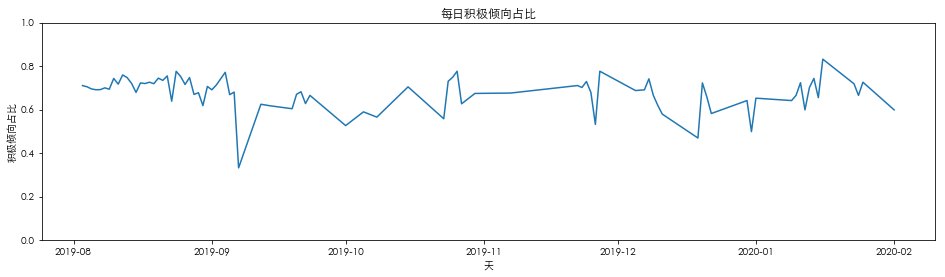

In [81]:
# 每日 pos发言占比 波动

import datetime as dt
plt.figure(figsize=(16,4))

dates_YMD = df_YMD_pinci_pos.ctime_Y_M_D.values.tolist()
x = [dt.datetime.strptime(d,'%Y-%m-%d') for d in dates_YMD]
y = df_YMD_pinci_pos.ratio.values.tolist()

plt.plot_date(x, y, '-')
plt.ylim(0,1)

plt.title('每日积极倾向占比')#显示图表标题
plt.xlabel('天')#x轴名称
plt.ylabel('积极倾向占比')#y轴名称    
plt.show()

In [126]:
# 9.7日为啥怎么滴
pd.set_option('display.max_rows',None)  # 不限制行数
df_YMD_pinci_pos.head(200)

,ctime_Y_M_D,message,sentiment_incl,ratio
0,2019-08-03,45860,32639,0.711710
1,2019-08-04,43632,30824,0.706454
2,2019-08-05,16918,11781,0.696359
3,2019-08-06,8073,5592,0.692679
4,2019-08-07,3859,2675,0.693185
5,2019-08-08,1992,1397,0.701305
6,2019-08-09,1368,951,0.695175
7,2019-08-10,1144,852,0.744755
8,2019-08-11,742,533,0.718329
9,2019-08-12,447,340,0.760626


In [134]:
df[df['ctime_Y_M_D'] == '2019-09-07']

,keyOrder,ctime,message,text_confidence,text_pos_score,text_neg_score,sentiment_score,sentiment_incl,ctime_specific,ctime_Y_M_D,ctime_hour
129312,129313,2019-09-07 00:09:56,后来没听到怎么样了？。,0.986603,0.006029,0.993971,-0.993971,0,00:09:56,2019-09-07,2019-09-07 00
129313,129314,2019-09-07 00:50:45,好的。,0.983305,0.992487,0.007513,0.992487,1,00:50:45,2019-09-07,2019-09-07 00
129314,129315,2019-09-07 01:09:08,来了！。,0.547070,0.796181,0.203819,0.796181,1,01:09:08,2019-09-07,2019-09-07 01
129315,129316,2019-09-07 01:49:26,加油！一年前关注的你！。,0.999943,0.999974,0.000026,0.999974,1,01:49:26,2019-09-07,2019-09-07 01
129316,129317,2019-09-07 04:10:13,支持合法维权，让法律不给不法分子猖狂的机会[吐]。,0.977902,0.009944,0.990056,-0.990056,0,04:10:13,2019-09-07,2019-09-07 04
129317,129318,2019-09-07 06:39:14,发生啥了看不懂。,0.997170,0.001274,0.998726,-0.998726,0,06:39:14,2019-09-07,2019-09-07 06
129318,129319,2019-09-07 10:01:36,我就是看一下评论差点没吓死这么多6级大佬。,0.918380,0.036729,0.963271,-0.963271,0,10:01:36,2019-09-07,2019-09-07 10
129319,129320,2019-09-07 10:11:10,又不是让你改身份证名字，扯的没用的。,0.999434,0.000255,0.999745,-0.999745,0,10:11:10,2019-09-07,2019-09-07 10
129320,129321,2019-09-07 11:29:23,镇站之宝。,0.930047,0.968521,0.031479,0.968521,1,11:29:23,2019-09-07,2019-09-07 11
129321,129322,2019-09-07 11:38:27,开玩笑，身份证是国家发给我的，你去告国家？。,0.994741,0.002367,0.997633,-0.997633,0,11:38:27,2019-09-07,2019-09-07 11


## 前72小时pos倾向占比

In [69]:
# 每时 发言频次 波动

# 每hour 发言频次
res1_hour = df.groupby('ctime_hour')['message'].count()  
# 每日正向发言频次
res2_hour = df.groupby('ctime_hour')['sentiment_incl'].sum()

dict_res_1_2_hour = {'ctime_hour':res1_hour.index,'message':res1_hour.values, 'sentiment_incl':res2_hour.values}
df_YMD_pinci_pos_hour = pd.DataFrame(dict_res_1_2_hour)

def getRatio(n1, n2):

    n1 = float(n1)
    n2 = float(n2)
    temp = float(n1/n2)
    return temp

df_YMD_pinci_pos_hour['ratio']= df_YMD_pinci_pos_hour.apply(lambda x : getRatio(x['sentiment_incl'],x['message']),axis = 1)# axis=1意味着把行 当做变量传进去,
#df_YMD_pinci_pos = df_YMD_pinci_pos[:30]

message_limit = 20
#df_YMD_pinci_pos_hour = df_YMD_pinci_pos_hour[df_YMD_pinci_pos_hour.message >= message_limit]
df_YMD_pinci_pos_hour.head()

,ctime_hour,message,sentiment_incl,ratio
0,2019-08-03 16,4237,3042,0.717961
1,2019-08-03 17,6751,4805,0.711746
2,2019-08-03 18,6728,4959,0.737069
3,2019-08-03 19,6004,4356,0.725516
4,2019-08-03 20,5355,3846,0.718207


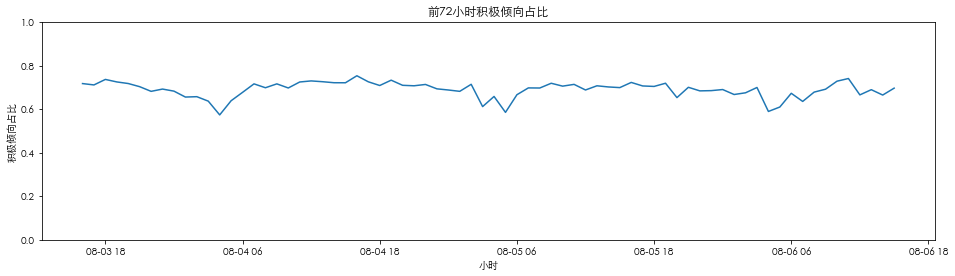

In [75]:
# 72hour pos发言占比 波动

import datetime as dt
plt.figure(figsize=(16,4))

dates_H = df_YMD_pinci_pos_hour.ctime_hour.values.tolist()[:72]
x = [dt.datetime.strptime(d,'%Y-%m-%d %H') for d in dates_H]
y = df_YMD_pinci_pos_hour.ratio.values.tolist()[:72]

plt.plot_date(x, y, '-')
plt.ylim(0,1)
plt.title('前72小时积极倾向占比')#显示图表标题

plt.xlabel('小时')#x轴名称
plt.ylabel('积极倾向占比')#y轴名称
plt.show()

## 倾向观点占比

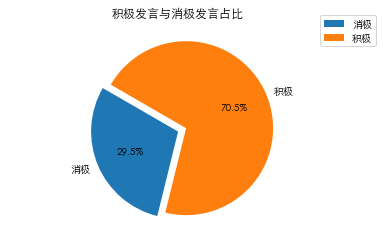

In [104]:
res_pie = df.groupby('sentiment_incl')['message'].count()  
dict_res_pie = {'incline':res_pie.index,'message':res_pie.values}
df_pie = pd.DataFrame(dict_res_pie)

labels = ["消极","积极"]
sizes = df_pie.message.values.tolist()

plt.title("积极发言与消极发言占比")
plt.axis('equal')   #该行代码使饼图长宽相等

plt.pie(sizes,labels=labels,explode=(0,0.1),autopct='%1.1f%%',shadow=False,startangle=150)

plt.legend(loc="upper right",fontsize=10,bbox_to_anchor=(1.1,1.05),borderaxespad=0.3)


## DEMO：datetime方法对日期转换，利用时间轴表现values

In [16]:
# python dt方法对于日期的转换
import datetime as dt
day = dt.datetime.strptime('2019-08-03 16:38:26', '%Y-%m-%d %H:%M:%S')
day


datetime.datetime(2019, 8, 3, 16, 38, 26)

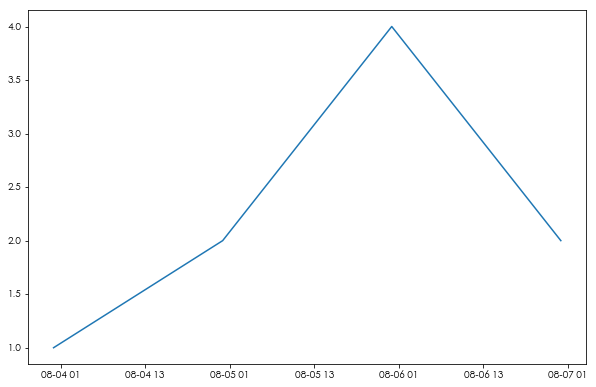

In [17]:
# python 利用日期作为横坐标

import datetime as dt
plt.figure(figsize=(10, 6.5))
dates = ['2019-08-04','2019-08-05','2019-08-06','2019-08-07']
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y = [1, 2, 4, 2]

plt.plot_date(x, y, '-')
plt.show()